# Test code for skull extraction using FSL BET 
- Uses neurodocker+nipype: https://miykael.github.io/nipype_tutorial/notebooks/introduction_docker.html
- Code examples: 
    - https://github.com/miykael/nipype_tutorial/blob/master/notebooks/basic_data_input.ipynb
    - https://nipype.readthedocs.io/en/latest/interfaces/generated/interfaces.fsl/preprocess.html

In [ ]:
# imports
from nilearn import image as nli
import nipype.interfaces.io as nio
from nilearn.plotting import plot_epi
import matplotlib.pyplot as plt
%matplotlib inline
from nipype.interfaces import fsl

# Sample data

In [23]:
datasource1 = nio.DataGrabber()
datasource1.inputs.base_directory = '/data/ds000114'
test_img = '/data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz'

# Run BET with skull extraction

In [25]:
btr = fsl.BET()
btr.inputs.in_file = test_img
btr.inputs.frac = 0.7
btr.inputs.mask = True
btr.inputs.skull = True
btr.inputs.out_file = 'brain_anat.nii'
res = btr.run() 

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/find_cuts.py:285: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data[slices] *= 1.e-3


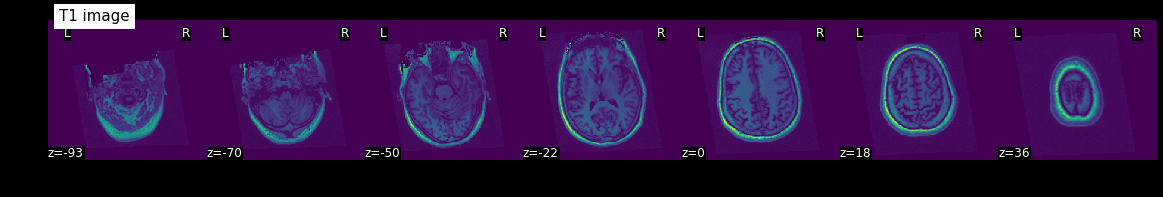

In [30]:
plot_epi(test_img,
         title='T1 image', display_mode='z',
         cmap=plt.cm.viridis);

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/find_cuts.py:285: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data[slices] *= 1.e-3


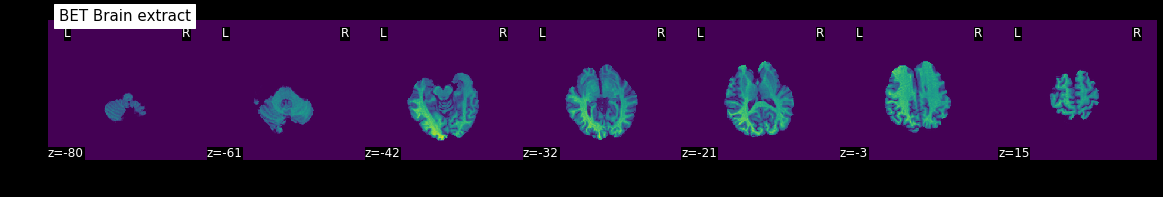

In [31]:
plot_epi('brain_anat.nii.gz',
         title='BET Brain extract', display_mode='z',
         cmap=plt.cm.viridis);

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/find_cuts.py:285: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data[slices] *= 1.e-3
/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


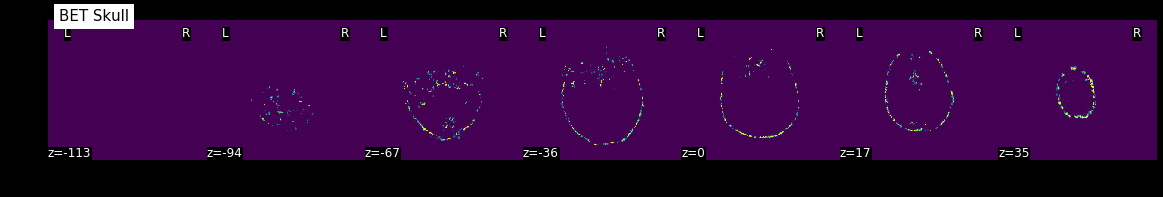

In [32]:
plot_epi('brain_anat_skull.nii.gz',
         title='BET Skull', display_mode='z',
         cmap=plt.cm.viridis);

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/find_cuts.py:285: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data[slices] *= 1.e-3
/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


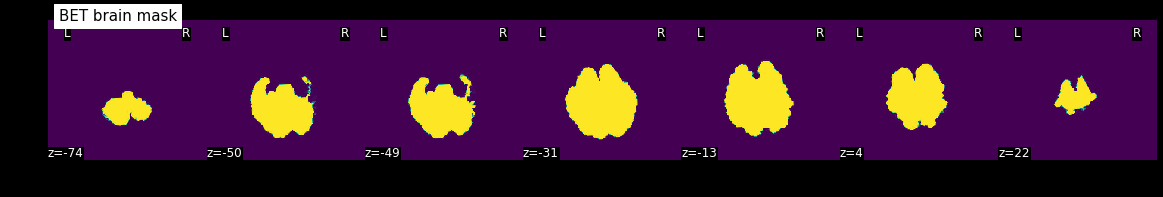

In [33]:
plot_epi('brain_anat_mask.nii.gz',
         title='BET brain mask', display_mode='z',
         cmap=plt.cm.viridis);